In [1]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

In [2]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] + " I am"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] + " happy"}

def node_3(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] + " sad"}

In [10]:
import random 
from typing import Literal

def decide_mood(state) -> Literal["node_2", "node_3"]:
    if random.random() > 0.5:
        return "node_2"
    else:
        return "node_3"

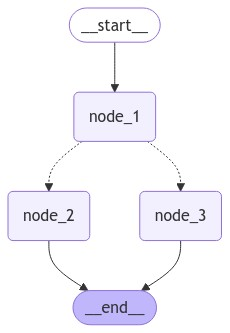

In [11]:
from langgraph.graph import StateGraph, START, END

# Build graph 
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")

builder.add_conditional_edges("node_1", decide_mood)

builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

graph = builder.compile()


from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
graph.invoke({"graph_state": "I am Lance and..."})

---Node 1---
---Node 2---


{'graph_state': 'I am Lance and... I am happy'}